# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
# Importações importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\demo01.csv")

<h1> Estrutura de análise </h1>
    <h3> A análise a seguir será realizada em 4 etapas descritas abaixo</h3>
        <li> Análise Inicial - Um entendimento geral sobre os dados .
        <li> Análise dos qualitativos - Como é o comportamento distributivo das variáveis qualitativas.
        <li> Análise dos quantitativos - Como é o comportamento distributivo das variáveis quantitativas.
        <li> Análise de correlação - Como essas variáveis se comportam perante a variável dependente.

In [2]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:

texto_0 = f"\nO dataset apresenta {df.shape[0]} linhas e {df.shape[1]} colunas."
texto_1 = f"\nO total de atributos com vázios são {df.isnull().sum()[df.isnull().sum()>0].shape[0]}"

texto_3 = f"\nOs dados apresentam o número {df.duplicated().sum()} de dados repetidos"

print(texto_0,texto_1,texto_3)
if df.isnull().sum()[df.isnull().sum()>0].shape[0] != 0: # lógica para caso haja valores empty.
    print("\nOs atributos com vazios e quantidade por cada são:")
    display(df.isnull().sum()[df.isnull().sum()>0])


O dataset apresenta 16650 linhas e 16 colunas. 
O total de atributos com vázios são 0 
Os dados apresentam o número 9880 de dados repetidos


<li> Remoção de dados repetidos

In [4]:
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6770 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   6770 non-null   object 
 1   posse_de_veiculo       6770 non-null   object 
 2   posse_de_imovel        6770 non-null   object 
 3   qtd_filhos             6770 non-null   int64  
 4   tipo_renda             6770 non-null   object 
 5   educacao               6770 non-null   object 
 6   estado_civil           6770 non-null   object 
 7   tipo_residencia        6770 non-null   object 
 8   idade                  6770 non-null   float64
 9   tempo_emprego          6770 non-null   float64
 10  possui_celular         6770 non-null   int64  
 11  possui_fone_comercial  6770 non-null   int64  
 12  possui_fone            6770 non-null   int64  
 13  possui_email           6770 non-null   int64  
 14  qt_pessoas_residencia  6770 non-null   float64
 15  mau     

In [6]:
# Selecionar somente dados numéricos
descricao = df.select_dtypes(include=np.number).describe().T 
descricao['Unicos'] = [df[i].nunique() for i in descricao.T] # Adicionar os únicos de cada atributo
display(descricao)

,count,mean,std,min,25%,50%,75%,max,Unicos
qtd_filhos,6770.0,0.427917,0.751551,0.000000,0.000000,0.000000,1.00000,14.000000,8
idade,6770.0,44.323693,11.356149,22.030137,34.728767,43.524658,53.80000,68.909589,5298
tempo_emprego,6770.0,-168.927670,382.998181,-1000.665753,1.032877,4.289041,8.69589,42.906849,3005
possui_celular,6770.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1
possui_fone_comercial,6770.0,0.221713,0.415430,0.000000,0.000000,0.000000,0.00000,1.000000,2
possui_fone,6770.0,0.297489,0.457187,0.000000,0.000000,0.000000,1.00000,1.000000,2
possui_email,6770.0,0.083456,0.276591,0.000000,0.000000,0.000000,0.00000,1.000000,2
qt_pessoas_residencia,6770.0,2.197194,0.917465,1.000000,2.000000,2.000000,3.00000,15.000000,9


In [7]:
# Selecionar somente dados não numéricos
df.select_dtypes(exclude=np.number).describe().T

,count,unique,top,freq
sexo,6770,2,F,4449
posse_de_veiculo,6770,2,N,4211
posse_de_imovel,6770,2,Y,4493
tipo_renda,6770,5,Working,3449
educacao,6770,5,Secondary / secondary special,4695
estado_civil,6770,5,Married,4654
tipo_residencia,6770,6,House / apartment,6078
mau,6770,2,False,6472


<li> Observando que há atributos com menos de 10 categorias, para fins de análise, pode-se conseiderar esses como qualitativos.
<li> Remoção da chave primária
    

In [8]:
# Selecionar os atributos numéricos com menos de 10 classes 
colunas_cat = df.select_dtypes(include=np.number).nunique()[df.select_dtypes(include=np.number).nunique() <10].index.tolist()
# Somar com os categóricos.
colunas_cat += df.select_dtypes(exclude=np.number).columns.tolist()
# Passar para string
df_categorico = df.loc[:,colunas_cat].astype(str)
df_categorico.head()

,qtd_filhos,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,0,1,0,0,0,2.0,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,False
1,0,1,0,1,1,1.0,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,False
3,0,1,1,1,1,2.0,M,Y,Y,Working,Higher education,Married,House / apartment,False
4,0,1,0,0,0,2.0,F,Y,N,Working,Incomplete higher,Married,House / apartment,False
6,0,1,0,1,0,2.0,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,False


In [9]:
df_categorico.shape

(6770, 14)

In [10]:
# Selecionar somente os dados numéricos.
colunas = list(set(df.columns) - set(df_categorico.columns))
df_numericos = df.loc[:,colunas]
df_numericos.head()

,tempo_emprego,idade
0,3.106849,58.832877
1,8.358904,52.356164
3,2.106849,46.224658
4,3.021918,29.230137
6,4.024658,27.482192


In [11]:
df_numericos.shape

(6770, 2)

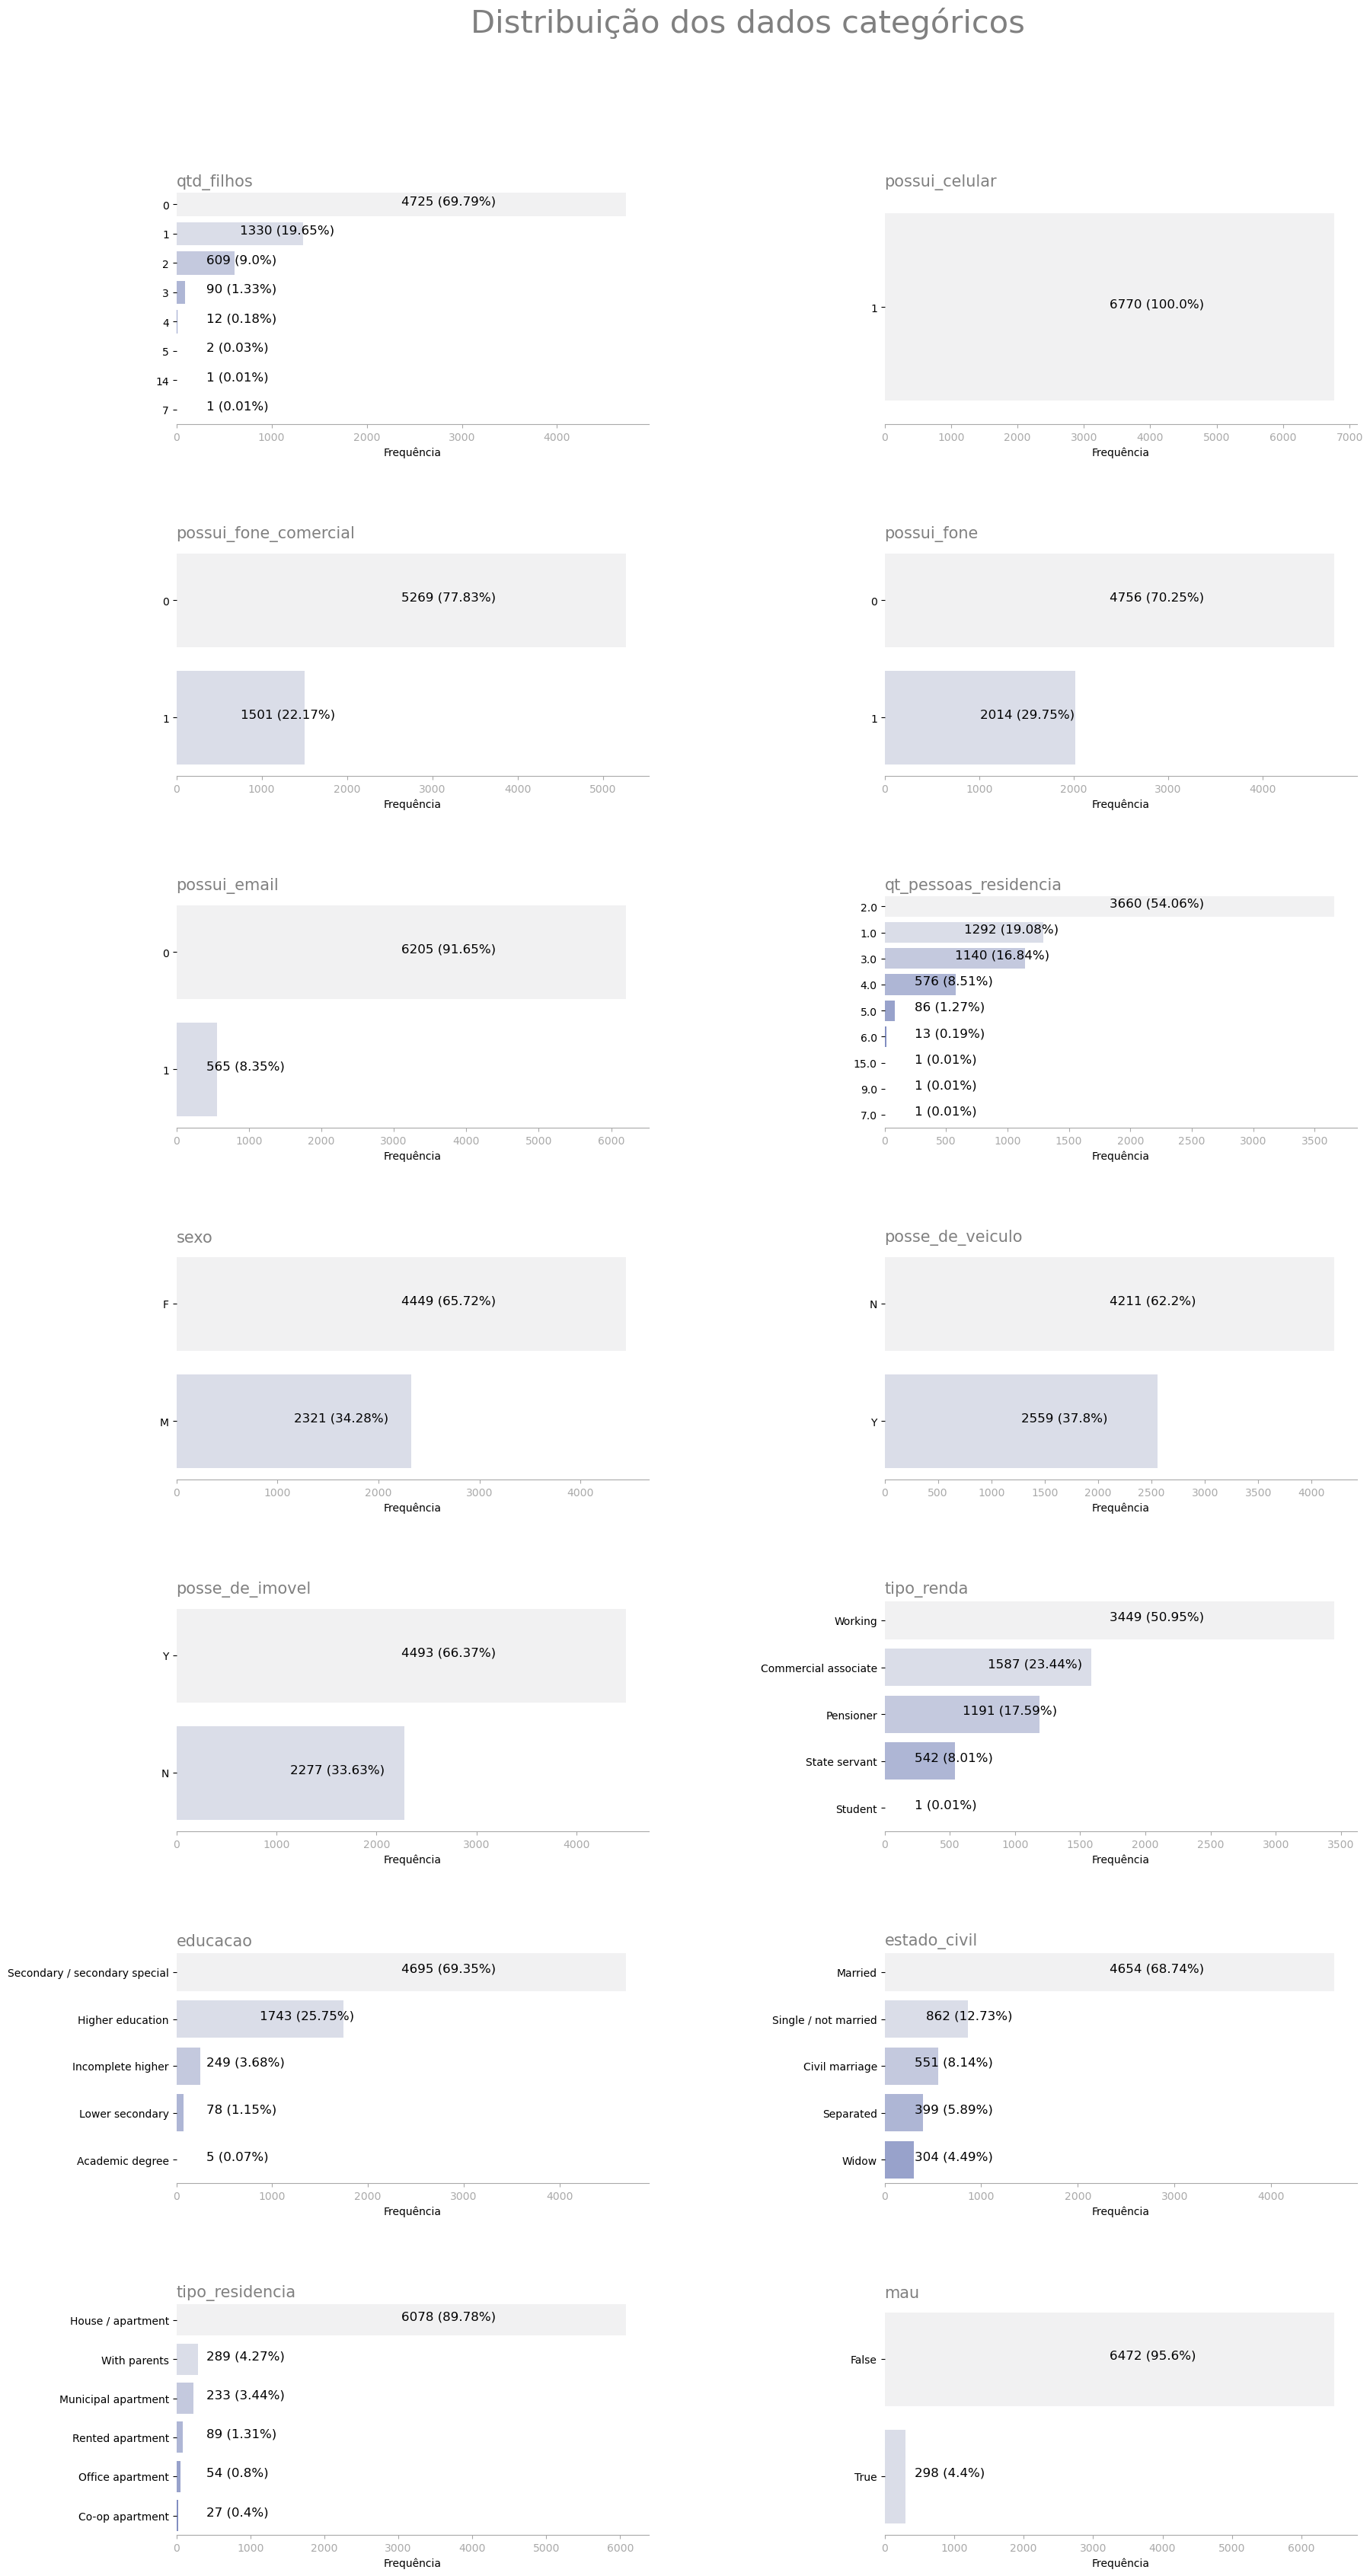

In [12]:
def qualitativos() -> None:
    # ----- Configuração inicial.
    figura = plt.figure(figsize=(20,40)) # Tamanho da imagem
    dt = df_categorico.copy() # Criaçaõ de cópia
    tamanho = (7,2) # Quantidade de linhas e colunas a imagem vai ter.
    plt.suptitle('Distribuição dos dados categóricos', fontsize=30, horizontalalignment='center' ,color='grey',y=0.94) # Título
    plt.subplots_adjust(wspace = 0.5, # Espaço vertical entre os gráficos
                        hspace = 0.5) # Espaço horizontal entre os gráficos

    c = 0 
    # lOOP pelas colunas
    for pos_x in range(tamanho[0]): # Loop da linha
        for pos_y in range(tamanho[1]): # Loop da coluna
            coluna = dt.columns[c] # Selecionar nome da coluna
            # Posição
            pos = (pos_x, pos_y) # Definir a posição da imagem
            ax = plt.subplot2grid(tamanho, pos) # Definir a AX de cada gráfico.
            color = '#78C' # Cor do palette
            
            # Plot das barras
            valores = dt[coluna].value_counts().values # O valor da frequência.
            categorias = dt[coluna].value_counts().index # A categoria da frequência.
            
            barra = sns.barplot(orient='h', # Para a barra ficar deitada
                                x = valores, 
                                y = categorias, 
                                palette = sns.light_palette(color) , # Utilizando um palette de cores para dar um degradee
                                dodge=False,
                                ax=ax) # Definição da AX.
            c += 1
            # Plot do texto na imagem.
            for cont, val in zip(range(len(valores)), valores): # LOOP da categoria com uma contagem para a posição de Y
                
                porc = val/(valores.sum()) # Porcentagem de cada categoria 
                plotar = f'{val} ({round(porc*100,2)}%) ' # O texto do total de cada categoria e sua porcentagem
                
                if porc < 0.1: # Para o gráfico não ficar com a visualização comprometida, valores abaixo de 10% ficam na pos de 1/15 da máxima 
                    text_pos = valores.max()/15 
                else:
                    text_pos = val/2
                    
                barra.annotate(plotar, # Texto
                               xy =  (text_pos, cont), # Posição do texto (x, y)
                               fontsize=12, # Tamanho da fonte
                               color='black') # Cor
             
            # Configuração Visual dos Gráficos
                    # Ajustes de configuração de axis.
            barra.set_title(f"{coluna}", horizontalalignment='left', color='grey', verticalalignment='center',
                            x=0, fontsize=15)
                  # Desativar
            barra.spines['top'].set_visible(False)
            barra.spines['right'].set_visible(False)
            barra.spines['left'].set_visible(False)
                  # Cor
            barra.spines['bottom'].set_color('darkgrey')
            barra.tick_params(axis='y', colors='black')
            barra.tick_params(axis='x', colors='darkgrey')
            barra.set(xlabel='Frequência', ylabel='')
    
    
    return plt.show()

qualitativos()

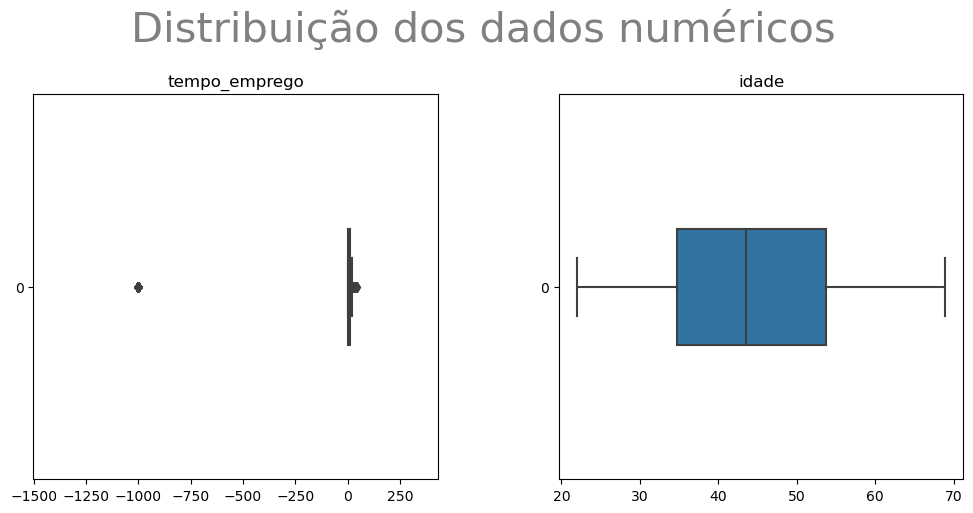

In [13]:
def quantitativo() -> None:
    figura = plt.figure(figsize=(12,5)) # Tamanho da imagem
    dt = df_numericos.copy() # Criaçaõ de cópia
    tamanho = (1,2) # Linhas e colunas da imagem
    plt.suptitle('Distribuição dos dados numéricos', fontsize=30, horizontalalignment='center' ,color='grey',y=1.05) # Título
    plt.subplots_adjust(wspace = 0.3, # Espaço vertical entre os gráficos
                        hspace = 0.5) # Espaço horizontal entre os gráficos
    
    c = 0
    for pos_0 in range(2): # Loop das colunas numéricas.
        coluna = dt.columns[c] # Nome da coluna
        # Posição
        ax = plt.subplot2grid(tamanho, (0,pos_0)) # Definir a AX de cada gráfico.
        
        box = sns.boxplot(dt[coluna], ax=ax,orient='h', width=0.3) # Plot do box.
        plt.title(f"{coluna}")
        if pos_0 == 0:
            print()
            box.set_xlim([dt[coluna].min()*1.5,dt[coluna].max()*10])

        c+=1

            
    return plt.show()

quantitativo()

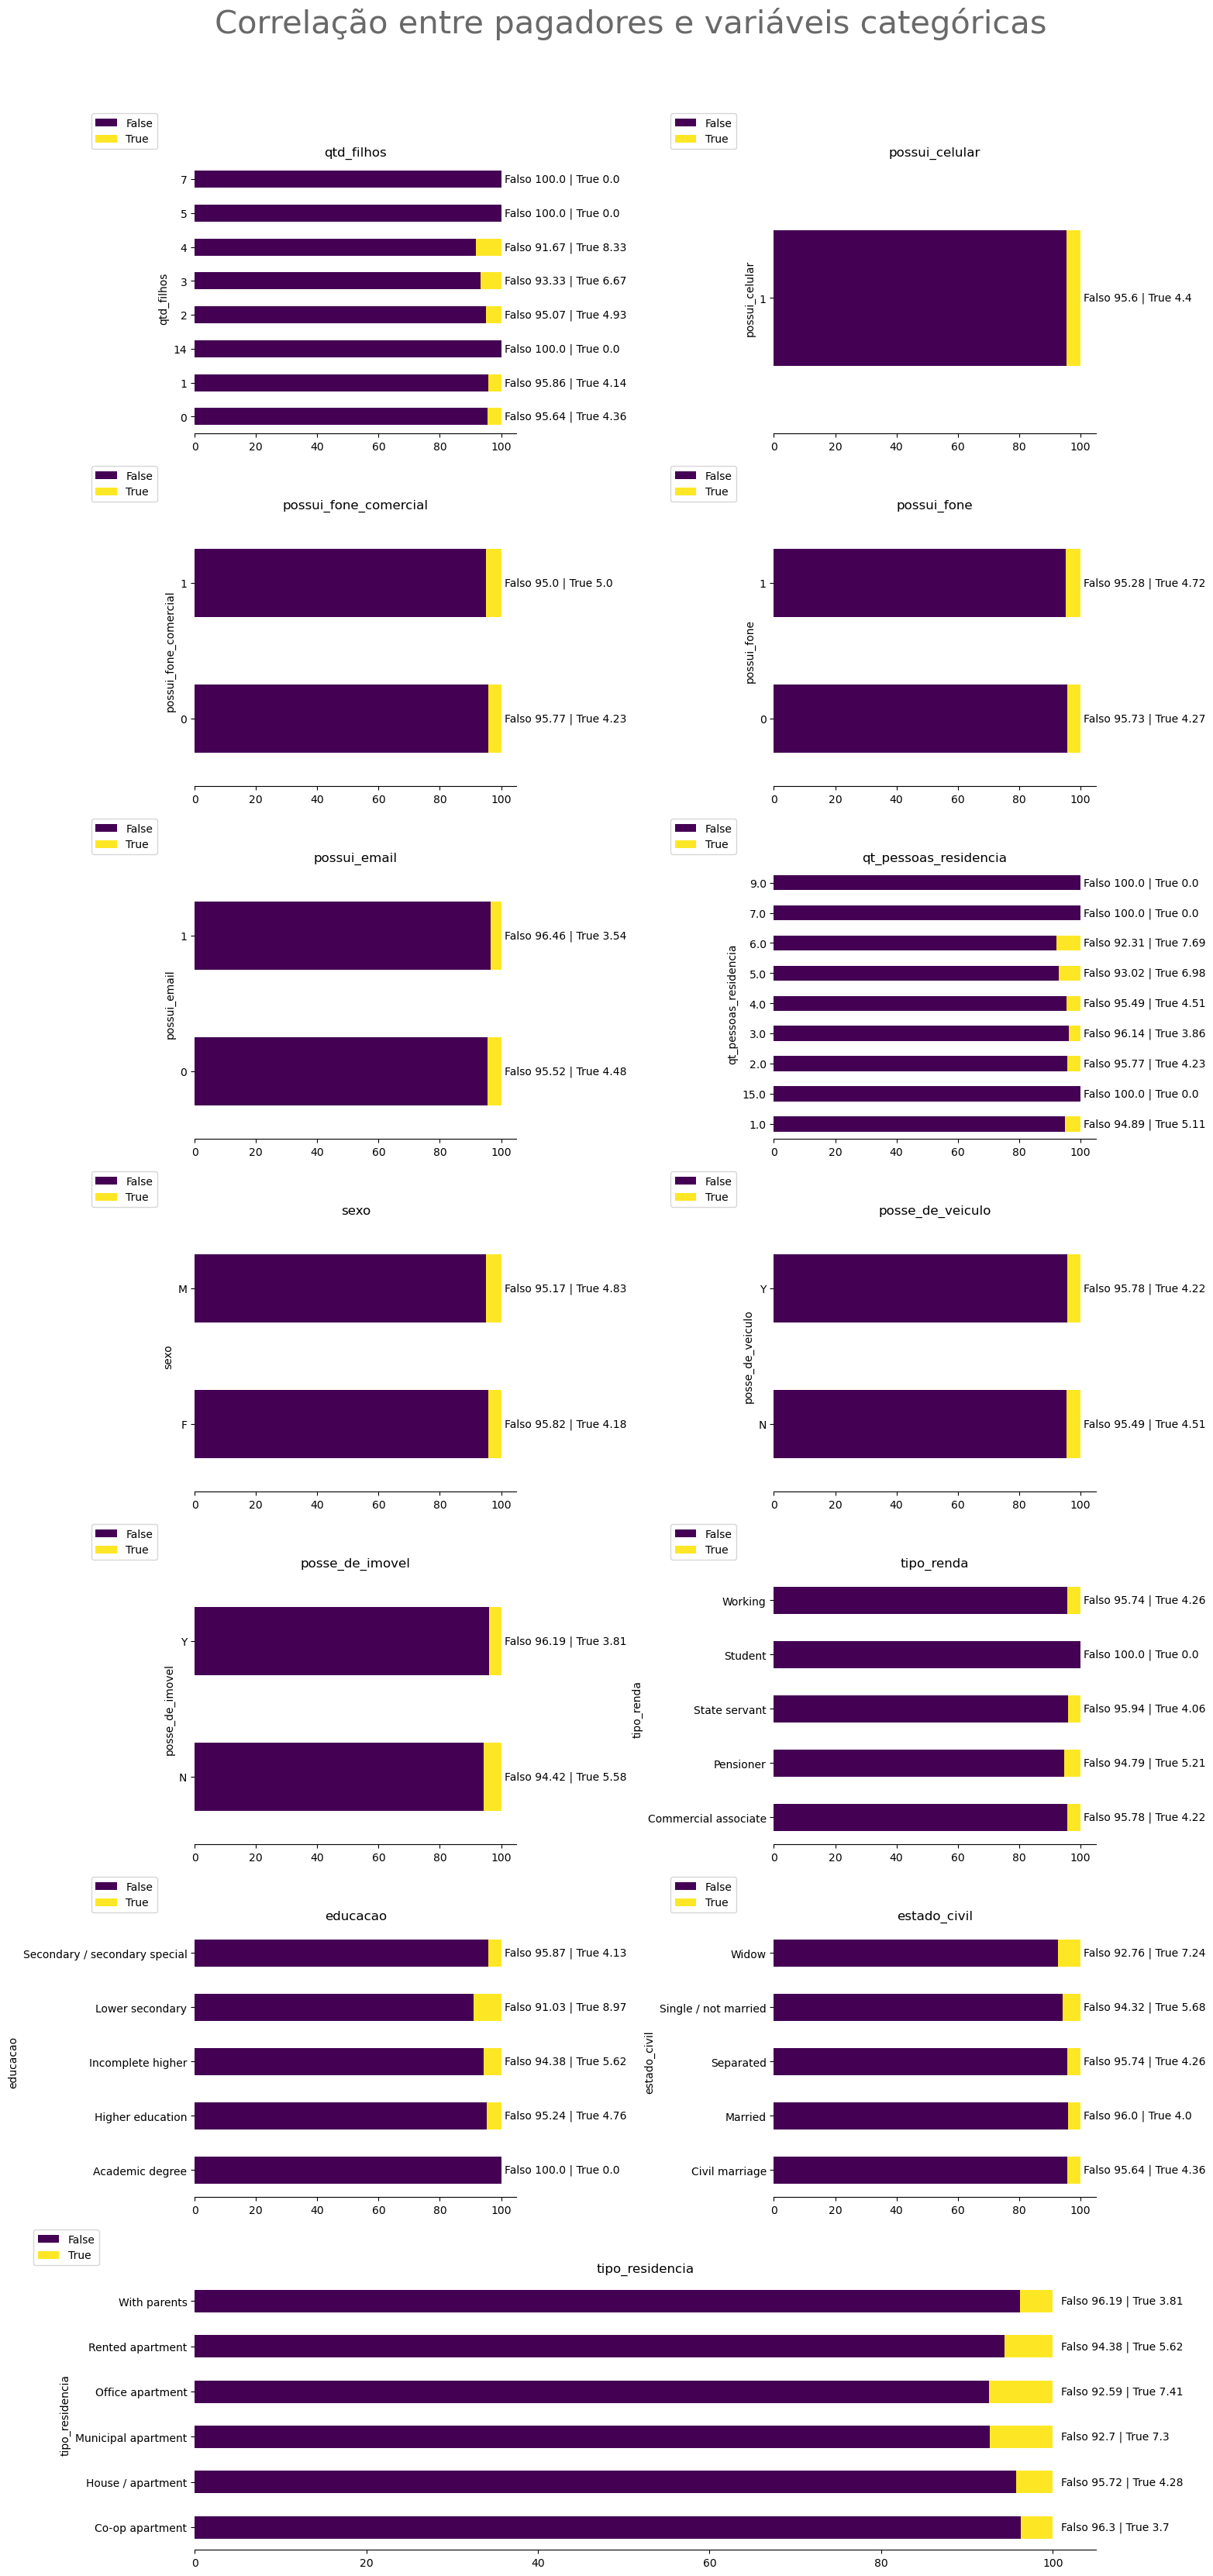

In [14]:
def corre_qual():
    figura = plt.figure(figsize=(15,40)) # Tamanho da imagem
    figura.suptitle('Correlação entre pagadores e variáveis categóricas', fontsize=30, color='dimgrey', y=0.93, horizontalalignment='center') # Título
    plt.subplots_adjust(wspace=0.8,hspace=0.3) # Ajustes dos gráficos da imagem..
    target = 'mau' # O atributo a ser comparado
    tamanho = (7,2) # Tamnanho da imagem
    col = 0 # Contador da coluna a ser trabalhada.
    dt = df_categorico.copy() # Cópia de segurança dos dados
    for pos_x in range(7): # Loop das linhas
        for pos_y in range(2): # Loop das colunas.
            coluna = dt.columns[col] # Coluna da ser trabalhada
            # Posição
            pos = (pos_x, pos_y) # definir posição.
            if pos_x == 6:
                ax = plt.subplot2grid(tamanho, pos, colspan=2) # Definir a AX de cada gráfico.
            else:
                ax = plt.subplot2grid(tamanho, pos) # Definir a AX de cada gráfico.

            freq = pd.crosstab(dt[target],dt[coluna]).T # Cross table para construir o gráfico.
            freq = round(freq.div(freq.sum(axis=1), axis=0)*100,2) # Porcentagem 
            bar = freq.plot(kind='barh', stacked=True, colormap='viridis', ax=ax) # Plot 
            bar.legend(bbox_to_anchor=(-0.1, 1.2)); # Posição da legenda do gráfico.
            c=0 # Contador

            for i in freq.T: # Plotar dados no gráfico.
                lista = freq.T[i].values
                texto = f"Falso {lista[0]} | True {lista[1]}"
                plt.annotate(texto, xy=(101,c), verticalalignment='center')

                c+=1      
            for caixa in ['left','top','right']: # Desativar barras.
                bar.spines[caixa].set_visible(False)


            bar.set_title(f"{coluna}") # Título do gráfico.
            if pos_x == 6: # Quebrar looping no último.
                break
            col += 1
            
            
corre_qual()

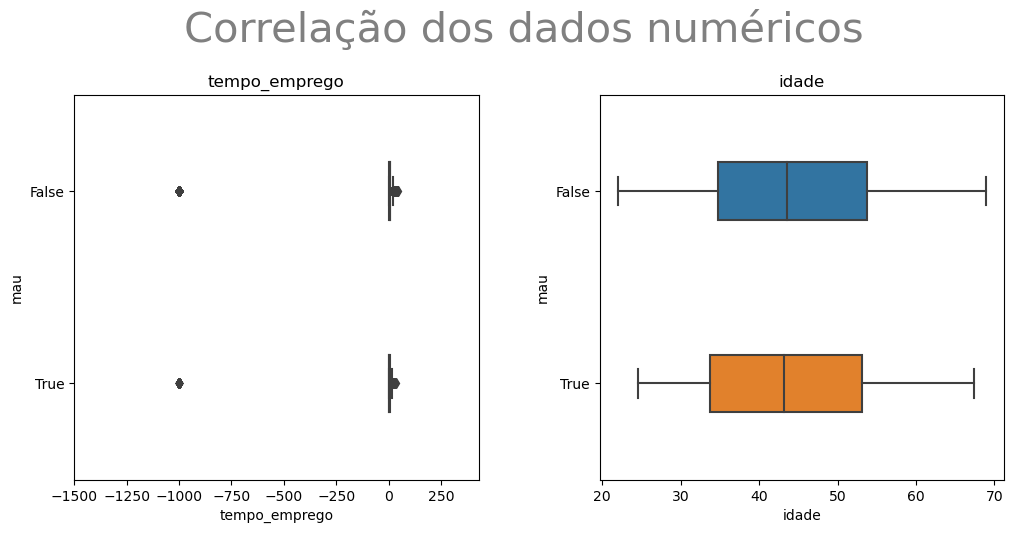

In [15]:
def corre_quant() -> None:
    figura = plt.figure(figsize=(12,5)) # Tamanoh da imagem
    dt = df_numericos.copy() # Criaçaõ de cópia
    tamanho = (1,2) # Linhas e colunas da imagem
    plt.suptitle('Correlação dos dados numéricos', fontsize=30, horizontalalignment='center' ,color='grey',y=1.05) # Título
    plt.subplots_adjust(wspace = 0.3, # Espaço vertical entre os gráficos
                        hspace = 0.5) # Espaço horizontal entre os gráficos
    
    c = 0 # Contador.
    for pos_0 in range(2):         # Loop da imagem
        coluna = dt.columns[c]
        # Posição
        ax = plt.subplot2grid(tamanho, (0,pos_0)) # Definir a AX de cada gráfico.
        
        box = sns.boxplot(x = dt[coluna],y = df['mau'],ax=ax,orient='h', width=0.3) # Plot do box.
        plt.title(f"{coluna}") # Título do gráfico.
        if pos_0 == 0: # Configurar o limite para tentar visualizar melhor.
            box.set_xlim([dt[coluna].min()*1.5,dt[coluna].max()*10])

        c+=1

            
    return plt.show()

corre_quant()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [16]:
lista = list()
for col in df:
    lista.append([col, df[col].dtype])
    
metadados = pd.DataFrame(lista,columns=['Atributo','Classe'])
metadados['qtd_categorias'] = df.nunique().values
display(metadados)

,Atributo,Classe,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [17]:
cat = list(set(df_categorico.columns) - set('mau'))
df_tratado = pd.get_dummies(df,columns=cat,drop_first=True)
df_tratado['mau'] = df['mau']

for change in df_tratado.select_dtypes(exclude=np.number):
    df_tratado[change] = LabelEncoder().fit_transform(df_tratado[change])
    
display(df_tratado)

,idade,tempo_emprego,qt_pessoas_residencia_2.0,qt_pessoas_residencia_3.0,qt_pessoas_residencia_4.0,qt_pessoas_residencia_5.0,qt_pessoas_residencia_6.0,qt_pessoas_residencia_7.0,qt_pessoas_residencia_9.0,qt_pessoas_residencia_15.0,...,tipo_renda_Working,qtd_filhos_1,qtd_filhos_2,qtd_filhos_3,qtd_filhos_4,qtd_filhos_5,qtd_filhos_7,qtd_filhos_14,possui_fone_1,mau
0,58.832877,3.106849,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,52.356164,8.358904,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,46.224658,2.106849,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29.230137,3.021918,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,27.482192,4.024658,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,34.857534,3.101370,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
16645,54.109589,9.884932,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16646,43.389041,7.380822,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
16647,30.005479,9.800000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [18]:
display(pd.crosstab(df['possui_email'],df['posse_de_veiculo']))
display(pd.crosstab(df['possui_email'],df['mau']),)
pd.crosstab(df['posse_de_veiculo'],df['mau'])

posse_de_veiculo,N,Y
possui_email,,
0,3878,2327
1,333,232


mau,False,True
possui_email,,
0,5927,278
1,545,20


mau,False,True
posse_de_veiculo,,
N,4021,190
Y,2451,108


In [19]:
(pd.crosstab(df['possui_email'],df['mau']).iloc[:,1]/(pd.crosstab(df['possui_email'],df['mau']).iloc[:,:].sum(1)))*100

possui_email
0    4.480258
1    3.539823
dtype: float64

In [20]:
(pd.crosstab(df['posse_de_veiculo'],df['mau']).iloc[:,1]/(pd.crosstab(df['posse_de_veiculo'],df['mau']).iloc[:,:].sum(1)))*100

posse_de_veiculo
N    4.511992
Y    4.220399
dtype: float64

<li> Provavelmente a variável "possui_email", por ter uma leve diferença de representação percentual de suas categorias de bons pagadores, pode ser mais relevante para a classificação que a variável posse_de_veiculo,mas a diferença proporcional das classes de cada uma pode também ser levada em consideração, já que 91,65% do atributo "possui_email" pertencem somente a uma classe, enquanto 62,2% pertencem a uma classe em "possuem veículo"

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [21]:
display(df_tratado)
df_tratado.to_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\dados_tratados_demo01.csv",index=False)

,idade,tempo_emprego,qt_pessoas_residencia_2.0,qt_pessoas_residencia_3.0,qt_pessoas_residencia_4.0,qt_pessoas_residencia_5.0,qt_pessoas_residencia_6.0,qt_pessoas_residencia_7.0,qt_pessoas_residencia_9.0,qt_pessoas_residencia_15.0,...,tipo_renda_Working,qtd_filhos_1,qtd_filhos_2,qtd_filhos_3,qtd_filhos_4,qtd_filhos_5,qtd_filhos_7,qtd_filhos_14,possui_fone_1,mau
0,58.832877,3.106849,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,52.356164,8.358904,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,46.224658,2.106849,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29.230137,3.021918,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,27.482192,4.024658,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,34.857534,3.101370,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
16645,54.109589,9.884932,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
16646,43.389041,7.380822,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
16647,30.005479,9.800000,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
